# Satellite ground track

In [8]:
%matplotlib inline
from datetime import datetime, timezone
from pathlib import Path

import numpy as np
from numpy import cos, sin, sqrt, exp, pi
from matplotlib import pyplot as plt

## Creation of a satellite

In [9]:
from blocksim.source.Satellite import SGP4Satellite

tle_pth = "iss.tle"
pt = (-74.0542275, 40.7004153)
tsync = datetime(year=2022, month=1, day=1, hour=13, tzinfo=timezone.utc)
iss = SGP4Satellite.fromTLE(tsync=tsync, tle_file=str(tle_pth))

## Simulation

In [10]:
from blocksim.Simulation import Simulation

sim = Simulation()
sim.addComputer(iss)

ns = 200
tps = np.linspace(0, 14400, ns)
sim.simulate(tps, progress_bar=False)

## Plotting

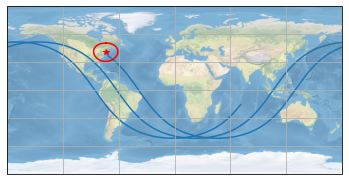

In [11]:
from blocksim.graphics.EarthPlotter import EarthPlotter

log = sim.getLogger()
lon = log.getValue("deg(iss_subpoint_lon)")
lat = log.getValue("deg(iss_subpoint_lat)")

fig = plt.figure()
ep = EarthPlotter()
axe = ep.createAxe(fig)
ep.plotGroundTrack(axe, lon, lat)
ep.plotDeviceReach(axe, coord=pt, elev_min=pi / 8, sat_alt=600e3, color="red")
ep.plotPoint(axe, coord=pt, marker="*", color="red")